In [22]:
%pylab inline

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

from soln.dataset import AllCategoricalsFeaturizer
from soln.dataset import generate_xv_splits
from soln.dataset import get_augmented_train_and_test_set
from soln.utils import dump_decision_tree
from soln.utils import eval_regressor
from soln.utils import print_feature_importances

Populating the interactive namespace from numpy and matplotlib


In [23]:
%time aug_train_set, aug_test_set = get_augmented_train_and_test_set()
%time X_train, y_train, X_test, y_test = next(generate_xv_splits(aug_train_set))

CPU times: user 6.7 s, sys: 40 ms, total: 6.74 s
Wall time: 6.81 s
CPU times: user 48 ms, sys: 0 ns, total: 48 ms
Wall time: 46.9 ms


In [24]:
featurizer = AllCategoricalsFeaturizer()
%time featurizer.fit(X_train)
%time X_train_feats = featurizer.transform(X_train)
%time X_test_feats = featurizer.transform(X_test)
X_train_feats.info(verbose=True)

%time X_train_np = X_train_feats.astype(np.float).values
y_train_np = y_train.values
%time X_test_np = X_test_feats.astype(np.float).values
y_test_np = y_test.values

CPU times: user 464 ms, sys: 8 ms, total: 472 ms
Wall time: 485 ms
CPU times: user 752 ms, sys: 272 ms, total: 1.02 s
Wall time: 1.03 s
CPU times: user 92 ms, sys: 0 ns, total: 92 ms
Wall time: 106 ms
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27270 entries, 0 to 27269
Data columns (total 460 columns):
annual_usage                                           int64
min_order_quantity                                     int64
bracket_pricing                                        bool
quantity                                               int64
diameter                                               float64
wall_thickness                                         float64
length                                                 float64
num_bends                                              int64
bend_radius                                            float64
end_a_1x                                               bool
end_a_2x                                               bool
end_x_1x     

In [25]:
regressors = [
    DummyRegressor(strategy='constant', constant=0.0),
    DummyRegressor(strategy='mean'),
    RandomForestRegressor(n_estimators=20),
    # RandomForestRegressor(n_estimators=100),
]

for reg in regressors:
    %time train_rmsle, test_rmsle = eval_regressor(reg, X_train_np, y_train_np, X_test_np, y_test_np)
    print "{}:".format(reg)
    print "    train RMSLE {}".format(train_rmsle)
    print "    test RMSLE {}".format(test_rmsle)
    print

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 41.2 ms
DummyRegressor(constant=array(0.0), quantile=None, strategy='constant'):
    train RMSLE 2.35096935718
    test RMSLE 2.33511433951

CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 40.6 ms
DummyRegressor(constant=None, quantile=None, strategy='mean'):
    train RMSLE 0.823285253414
    test RMSLE 0.822800797077

CPU times: user 44 s, sys: 212 ms, total: 44.2 s
Wall time: 44.7 s
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False):
    train RMSLE 0.0917631053117
    test RMSLE 0.282016842124



In [26]:
print_feature_importances(X_train_feats, reg);

adj_quantity 0.451671882978
diameter 0.120302716272
annual_usage 0.0699466891372
min_order_quantity 0.0527243842435
components other 0.0381164441673
quantity 0.036662751907
length 0.0355384842686
quote_age 0.0219725705376
end_a EF-003 0.0138944349016
bend_radius 0.011571466533
wall_thickness 0.0111385618898
supplier S-0041 0.00647451119576
end_x EF-003 0.00625627413632
supplier S-0054 0.00622503308881
num_bends 0.00612131309084
supplier S-0064 0.00594005132045
supplier S-0026 0.00581465542666
bracketing_pattern (1, 3, 5, 7, 9) 0.00491167266101
supplier S-0072 0.00387653587486
supplier S-0066 0.00383171274154
components C-0063 0.00312532892158
bracketing_pattern (5, 19, 20) 0.00269457386506
bracketing_pattern (1, 6, 20) 0.00251160805277
components C-1631 0.002379973962
bracketing_pattern other 0.00198289187902
material_id SP-0028 0.00190791946901
components C-1727 0.00179636893336
components C-1630 0.00171289081947
bracketing_pattern (1, 2, 5, 10, 25, 50, 100, 250) 0.00165307610117
end_

In [41]:
print_feature_importances(X_train_feats, reg.estimators_[0])

adj_quantity 0.383636015766
diameter 0.11265538548
quantity 0.102695954927
annual_usage 0.0695016293123
min_order_quantity 0.0562030720638
length 0.0381054124711
components other 0.0315695194441
quote_date_days_since_1900 0.0254373647876
end_a EF-003 0.0230288972112
supplier S-0054 0.0135606124729
bend_radius 0.0120611480668
num_bends 0.00732055109556
wall_thickness 0.00693447963585
bracketing (1, 3, 5, 7, 9) 0.00655966182841
supplier S-0026 0.00653500089742
supplier S-0041 0.00649436623324
end_x EF-003 0.00597924355396
supplier S-0066 0.00425901069624
bracketing other 0.00362096411591
supplier S-0072 0.00351878035727
end_a_2x 0.00322958809483
bracketing (1, 6, 20) 0.00272968076017
supplier S-0064 0.00271985531768
components C-1727 0.00266456998671
specs SP-0061 0.00201049974401
end_x EF-023 0.0019811121209
end_x_2x 0.0018908052284
bracketing (1, 2, 3, 4, 5) 0.00179992430602
components C-1629 0.00175922658999
bracketing (5, 19, 20) 0.00175655502861
components C-1445 0.00169516258566
ma

[('adj_quantity', 0.38363601576561601),
 ('diameter', 0.11265538548010036),
 ('quantity', 0.10269595492660942),
 ('annual_usage', 0.06950162931234817),
 ('min_order_quantity', 0.056203072063815751),
 ('length', 0.03810541247114544),
 ('components other', 0.031569519444086327),
 ('quote_date_days_since_1900', 0.02543736478764887),
 ('end_a EF-003', 0.0230288972111805),
 ('supplier S-0054', 0.013560612472883808),
 ('bend_radius', 0.01206114806682235),
 ('num_bends', 0.0073205510955589494),
 ('wall_thickness', 0.0069344796358468477),
 ('bracketing (1, 3, 5, 7, 9)', 0.0065596618284128761),
 ('supplier S-0026', 0.0065350008974187574),
 ('supplier S-0041', 0.0064943662332401595),
 ('end_x EF-003', 0.0059792435539641866),
 ('supplier S-0066', 0.004259010696238426),
 ('bracketing other', 0.0036209641159054905),
 ('supplier S-0072', 0.0035187803572677184),
 ('end_a_2x', 0.0032295880948316454),
 ('bracketing (1, 6, 20)', 0.0027296807601701685),
 ('supplier S-0064', 0.0027198553176849168),
 ('com

In [42]:
dump_decision_tree("tree0.pdf", X_train_feats, reg.estimators_[0], max_depth=5)

(27270,)

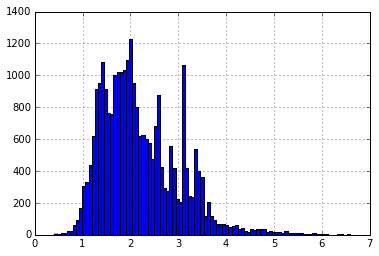

In [31]:
y_train.hist(bins=100)
y_train.shape

(27270,)

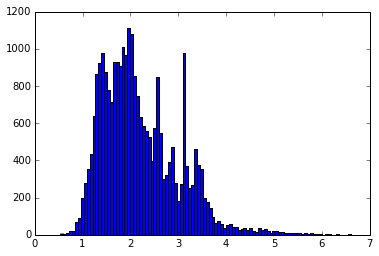

In [32]:
y_train_pred = reg.predict(X_train_np)
hist(y_train_pred, bins=100)
y_train_pred.shape

(2943,)

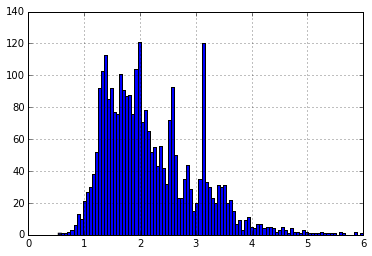

In [33]:
y_test.hist(bins=100)
y_test.shape

(2943,)

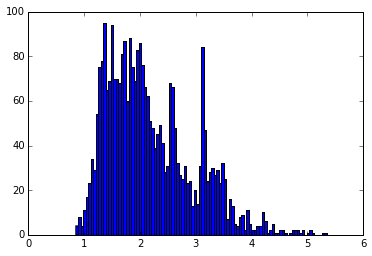

In [34]:
y_test_pred = reg.predict(X_test_np)
hist(y_test_pred, bins=100);
y_test_pred.shape

In [35]:
df = X_test.copy()
df['log_cost'] = y_test
df['pred_log_cost'] = y_test_pred
df

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,material_id,diameter,wall_thickness,...,num_bracket,num_other,specs,components,quote_age,adj_quantity,adj_bracketing,bracketing_pattern,log_cost,pred_log_cost
0,TA-00047,S-0072,2006-04-12,10,1,False,1,SP-0035,12.70,1.24,...,0,0,"[SP-0063, SP-0069, SP-0080]","[C-0448, C-0448, C-0449, C-0449]",38817,1,False,(),2.178639,2.308128
1,TA-00048,S-0026,2009-09-01,180,20,False,1,SP-0028,25.40,1.65,...,0,0,"[SP-0063, SP-0080]","[C-0444, C-0444, C-0445, C-0445]",40055,20,False,(),1.371342,1.602040
2,TA-00077,S-0066,2012-04-05,5,0,True,3,SP-0046,21.70,2.80,...,0,0,[],"[C-1312, C-1312]",41002,3,True,"(3, 6, 9, 12)",3.591937,3.608630
3,TA-00077,S-0066,2012-04-05,5,0,True,6,SP-0046,21.70,2.80,...,0,0,[],"[C-1312, C-1312]",41002,6,True,"(3, 6, 9, 12)",3.184610,3.331781
4,TA-00077,S-0066,2012-04-05,5,0,True,9,SP-0046,21.70,2.80,...,0,0,[],"[C-1312, C-1312]",41002,9,True,"(3, 6, 9, 12)",2.985319,3.192635
5,TA-00077,S-0066,2012-04-05,5,0,True,12,SP-0046,21.70,2.80,...,0,0,[],"[C-1312, C-1312]",41002,12,True,"(3, 6, 9, 12)",2.847651,2.511289
6,TA-00088,S-0013,2011-05-01,8,8,False,8,SP-0046,21.70,2.80,...,0,0,[],"[C-1312, C-1312]",40662,8,False,(),2.147291,2.510408
7,TA-00093,S-0066,2013-06-01,0,0,True,1,SP-0039,6.35,0.71,...,0,0,[],"[C-1312, C-1312]",41424,1,True,"(1, 2, 5, 10, 25, 50, 100, 250)",3.117823,3.117429
8,TA-00093,S-0066,2013-06-01,0,0,True,2,SP-0039,6.35,0.71,...,0,0,[],"[C-1312, C-1312]",41424,2,True,"(1, 2, 5, 10, 25, 50, 100, 250)",2.567439,2.567596
9,TA-00093,S-0066,2013-06-01,0,0,True,5,SP-0039,6.35,0.71,...,0,0,[],"[C-1312, C-1312]",41424,5,True,"(1, 2, 5, 10, 25, 50, 100, 250)",1.986917,1.984847
